# CO2 Emissions

## About Dataset

This dataset contains information on vehicle specifications, fuel consumption, and CO2 emissions, collected to analyze the environmental impact of vehicles and predict their CO2 emissions using regression models. The dataset is structured to support both Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) approaches for machine learning projects.

## Key Features
Brand: The brand or manufacturer of the vehicle (e.g., Toyota, Ford, BMW).

Vehicle Type: Classification of vehicles based on size and usage (e.g., SUV, Sedan).

Engine Size (L): Engine displacement volume in liters.

Cylinders: Number of cylinders in the engine.

Transmission: Type of transmission (e.g., Automatic, Manual).

Fuel Type: Type of fuel used by the vehicle (e.g., Gasoline, Diesel, Hybrid).

Fuel Consumption (City, Hwy, and Combined): Fuel efficiency measured in liters per 100 kilometers (L/100 km).

CO2 Emissions (g/km): Carbon dioxide emissions per kilometer (target variable for prediction).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV,BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [2]:
df = pd.read_csv('data/co2.csv')
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Data Preparation and Visualisation

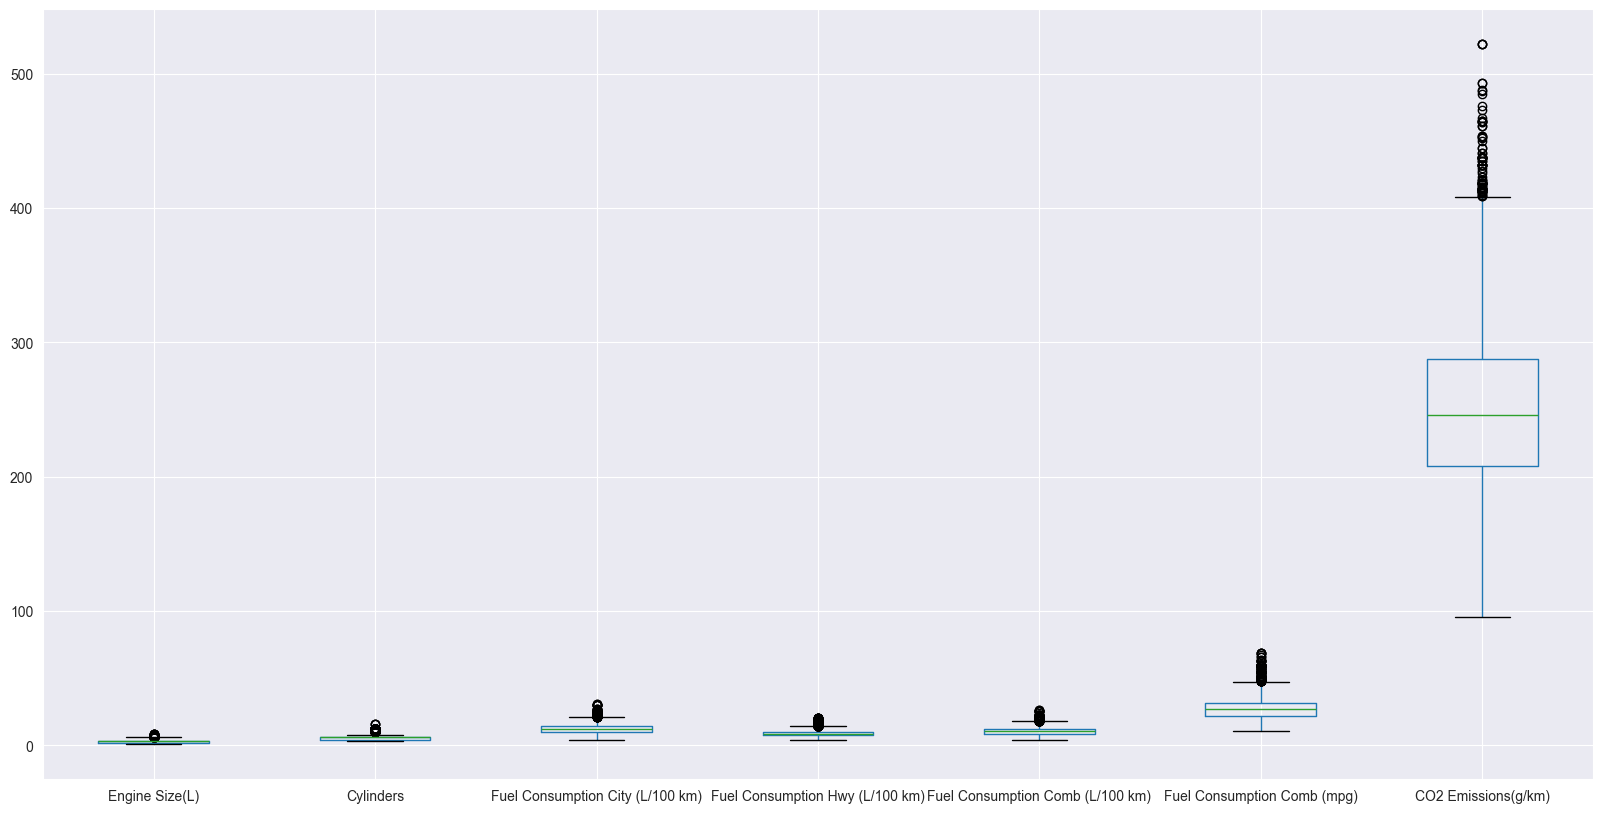

In [7]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

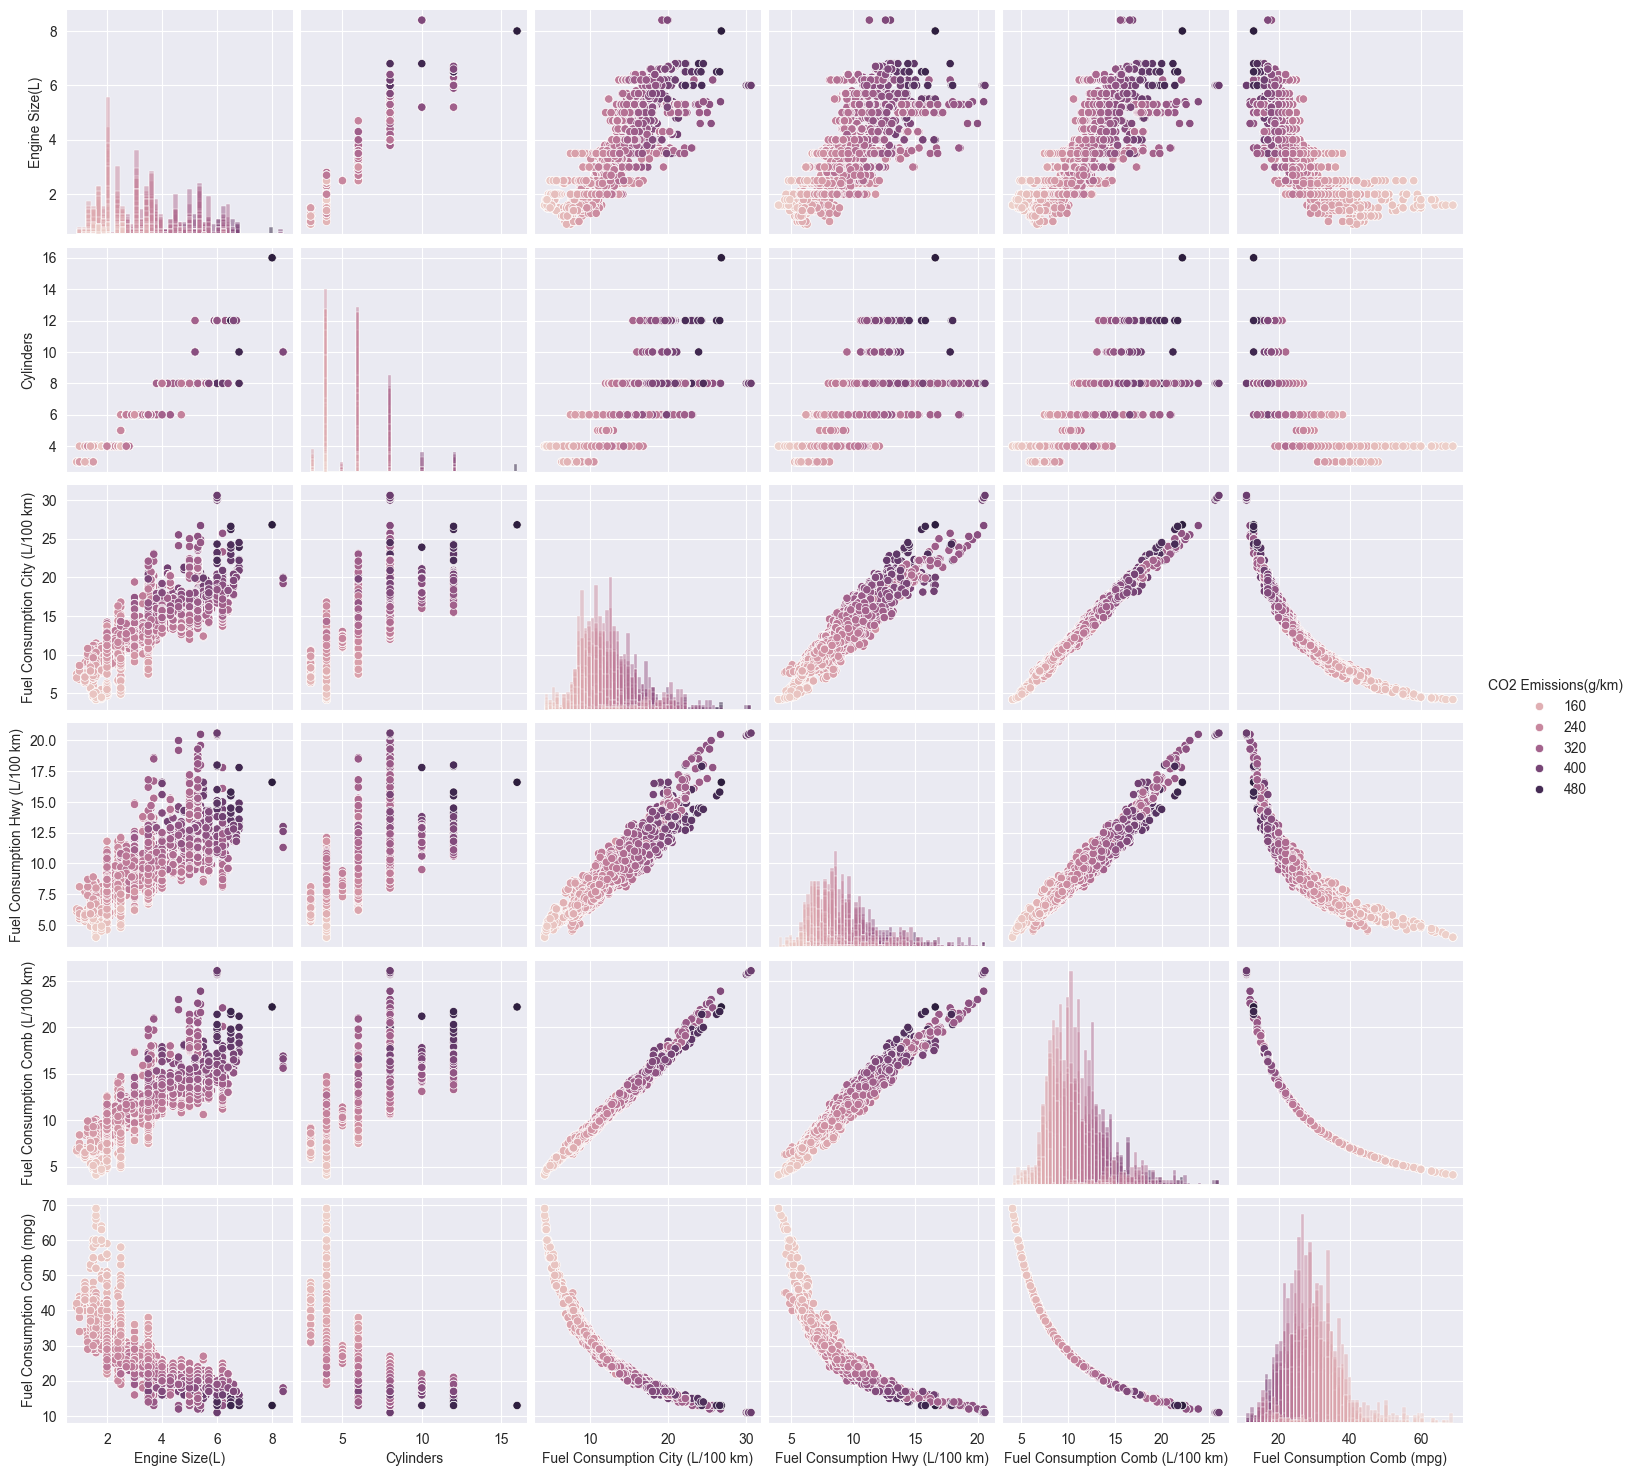

In [9]:
sns.pairplot(df,hue='CO2 Emissions(g/km)',diag_kind='hist')

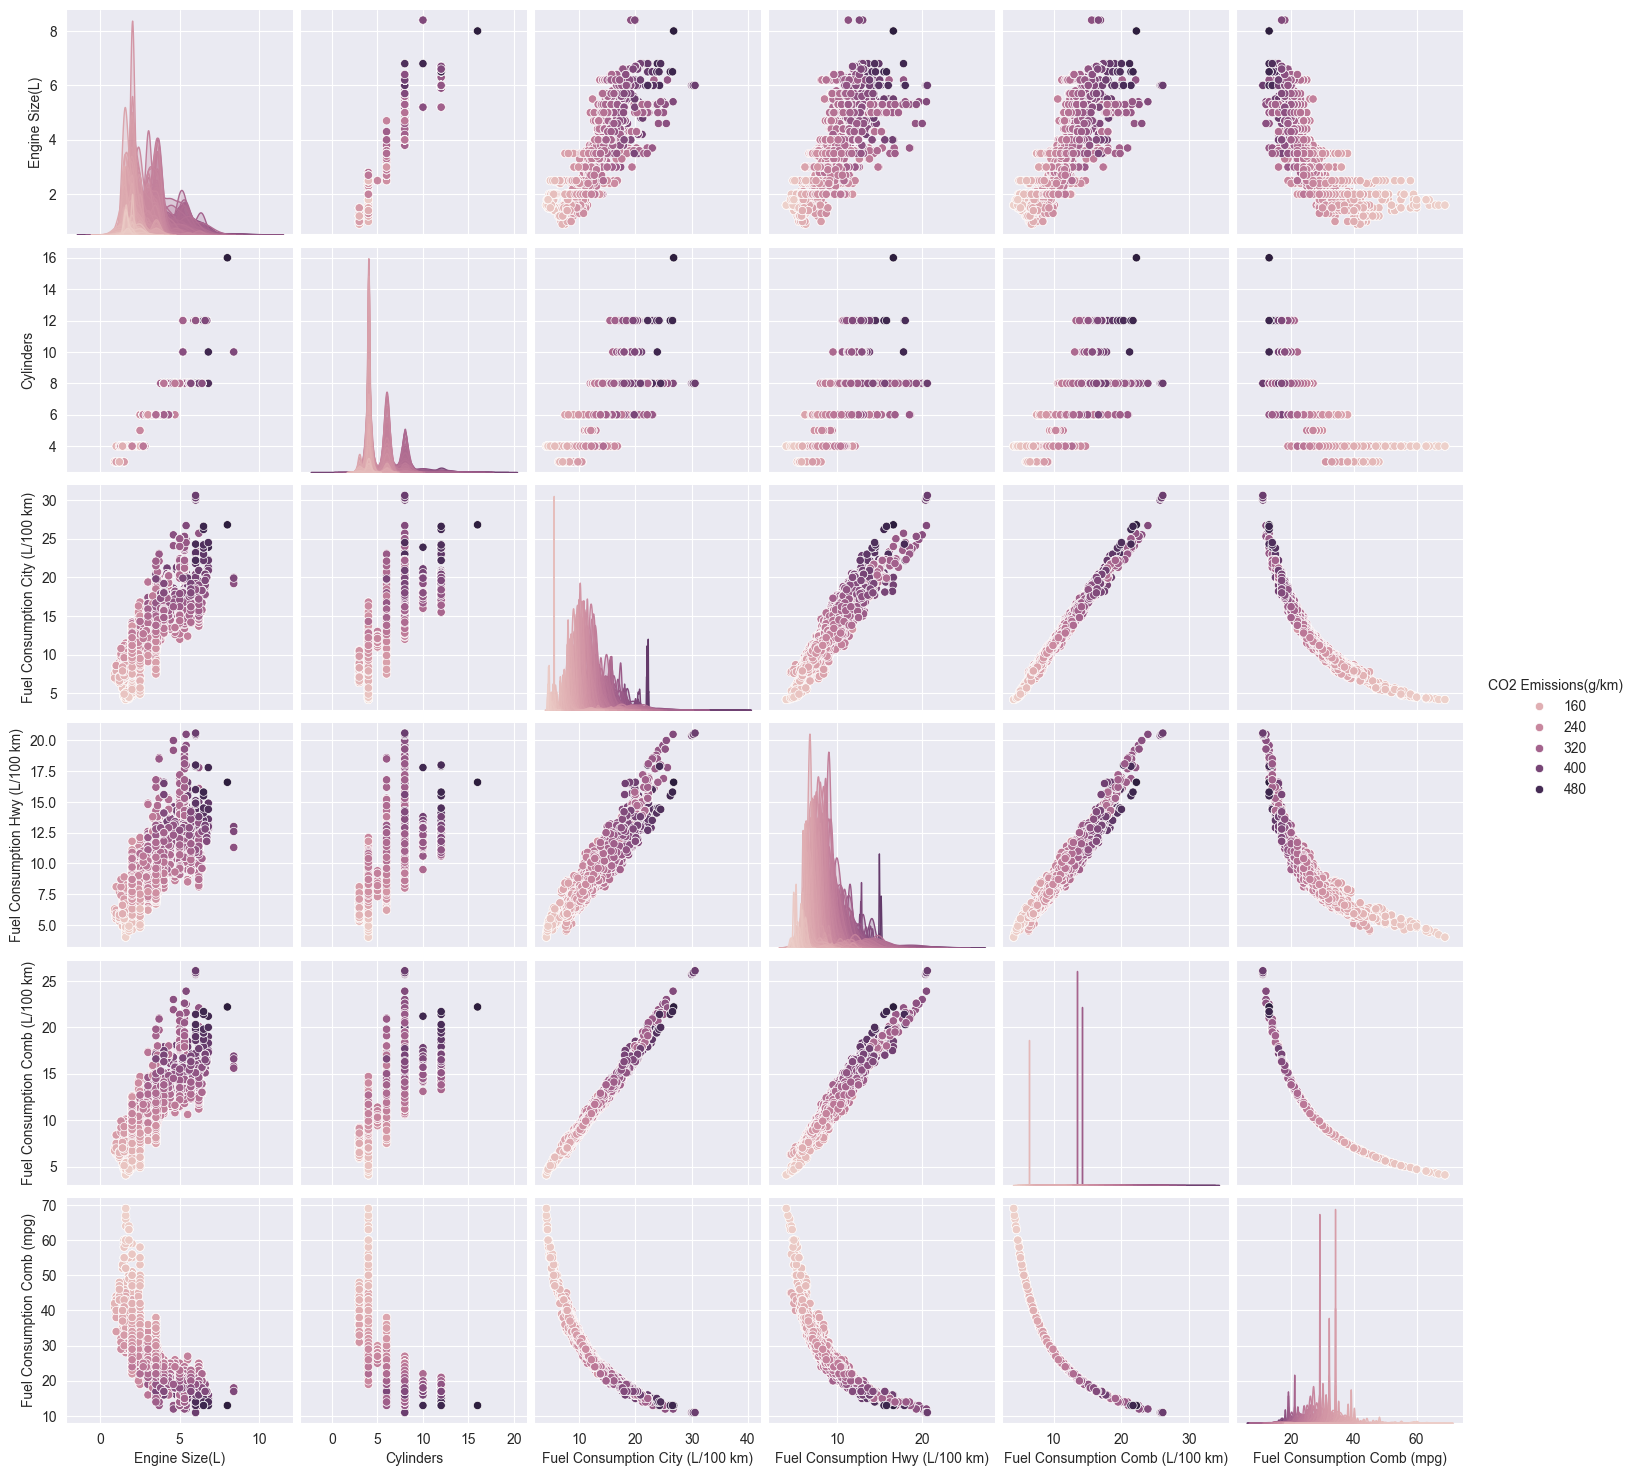

In [10]:
sns.pairplot(df,hue='CO2 Emissions(g/km)',diag_kind='kde')

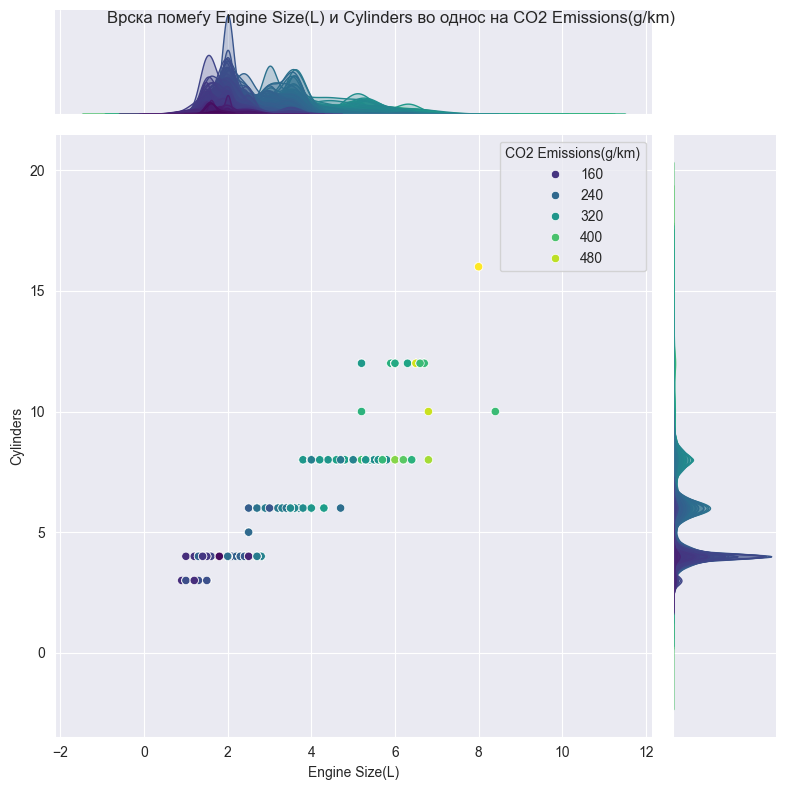

In [11]:
sns.jointplot(x='Engine Size(L)', y='Cylinders', data=df, hue='CO2 Emissions(g/km)',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу Engine Size(L) и Cylinders во однос на CO2 Emissions(g/km)')
plt.show()

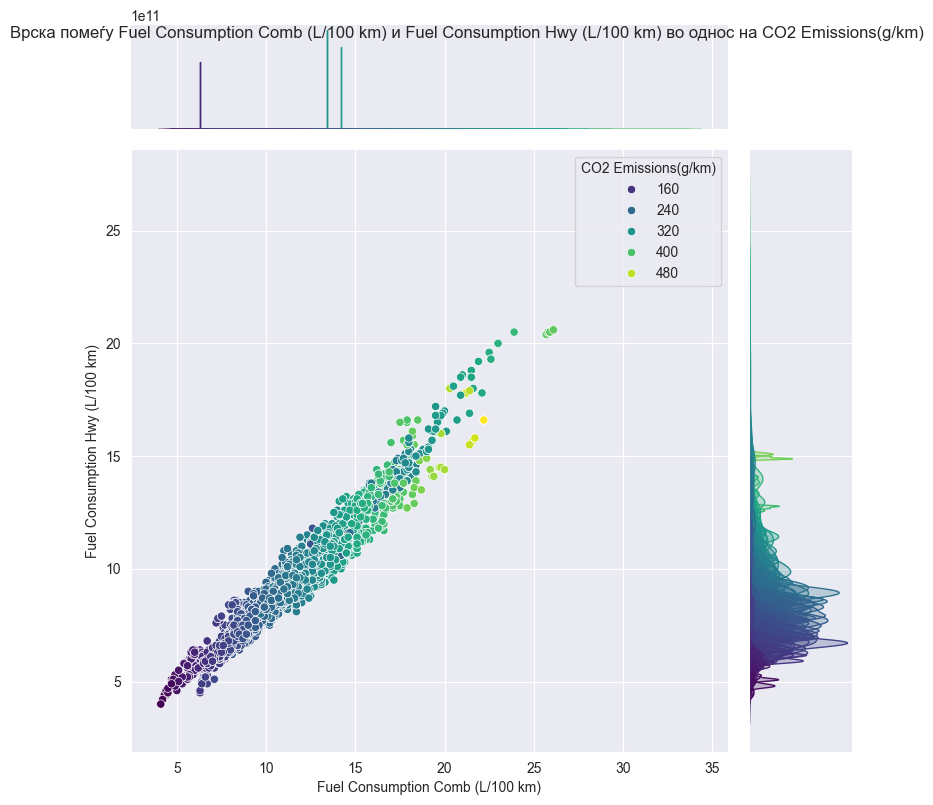

In [12]:
sns.jointplot(x='Fuel Consumption Comb (L/100 km)', y='Fuel Consumption Hwy (L/100 km)', data=df, hue='CO2 Emissions(g/km)',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу Fuel Consumption Comb (L/100 km) и Fuel Consumption Hwy (L/100 km) во однос на CO2 Emissions(g/km)')
plt.show()

C:\Users\Jovan\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


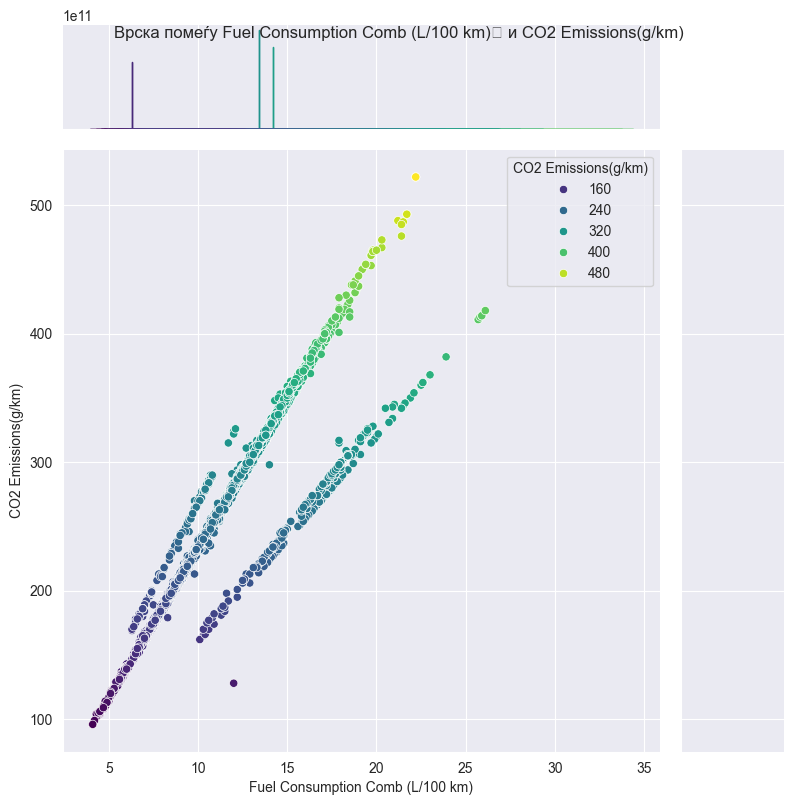

In [14]:
sns.jointplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=df, hue='CO2 Emissions(g/km)',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу Fuel Consumption Comb (L/100 km)	 и CO2 Emissions(g/km)')
plt.show()

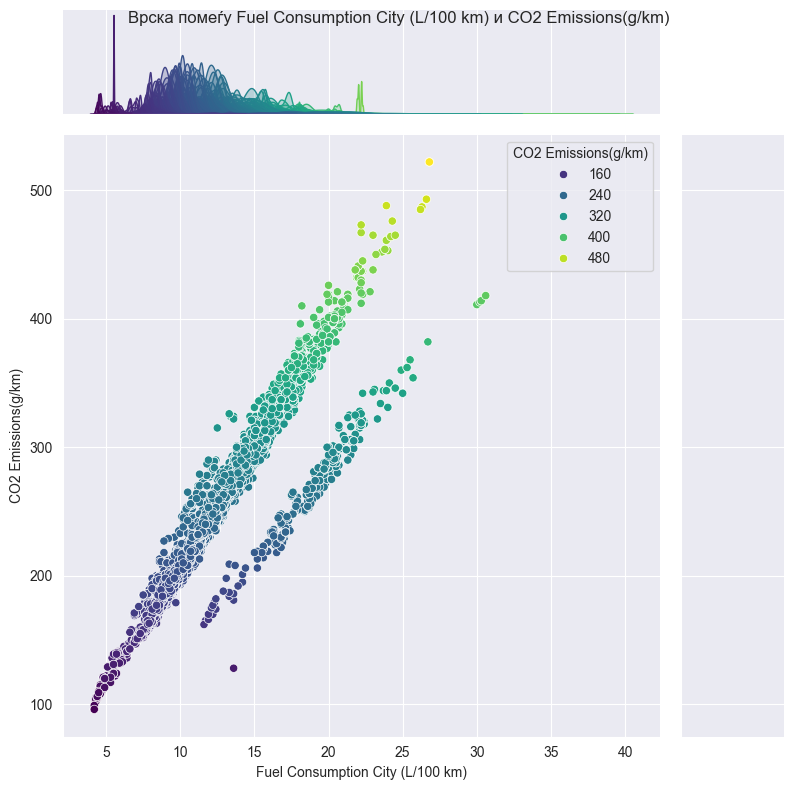

In [15]:
sns.jointplot(x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', data=df, hue='CO2 Emissions(g/km)',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу Fuel Consumption City (L/100 km) и CO2 Emissions(g/km)')
plt.show()

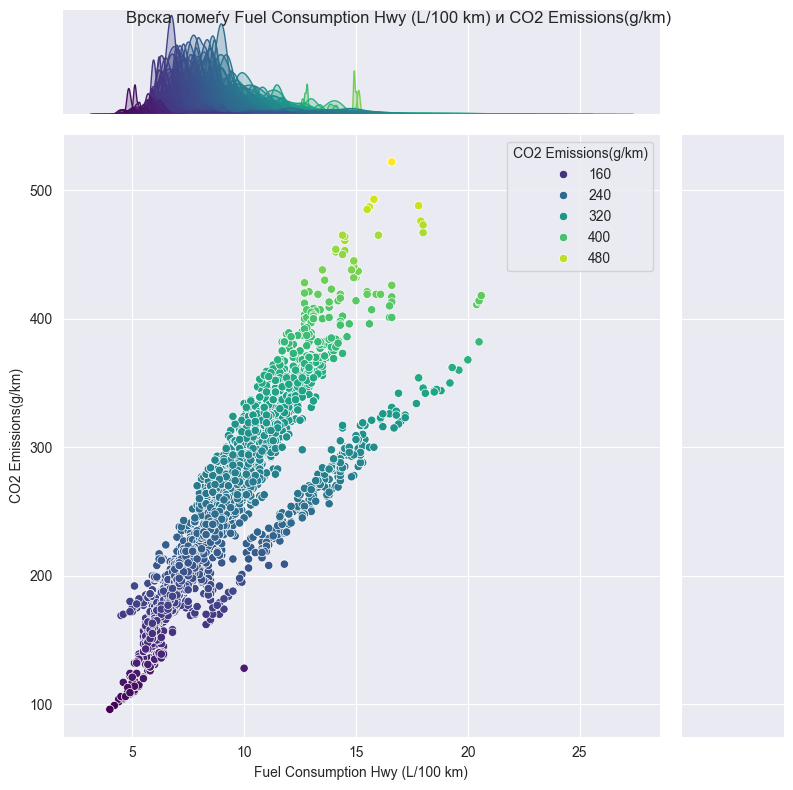

In [16]:
sns.jointplot(x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', data=df, hue='CO2 Emissions(g/km)',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу Fuel Consumption Hwy (L/100 km) и CO2 Emissions(g/km)')
plt.show()

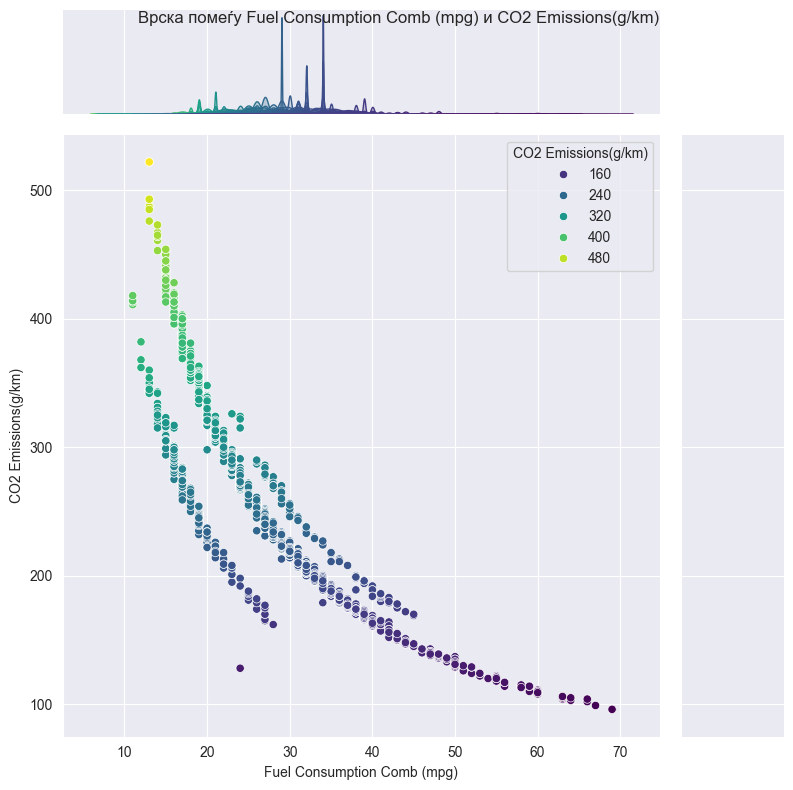

In [17]:
sns.jointplot(x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', data=df, hue='CO2 Emissions(g/km)',
              palette='viridis', height=8)
plt.suptitle('Врска помеѓу Fuel Consumption Comb (mpg) и CO2 Emissions(g/km)')
plt.show()

In [18]:
def label_encoder(dt:pd.DataFrame,col:list):
  for c in col:
    encoder = LabelEncoder()
    dt[c] = encoder.fit_transform(dt[c].astype(str))

  return dt


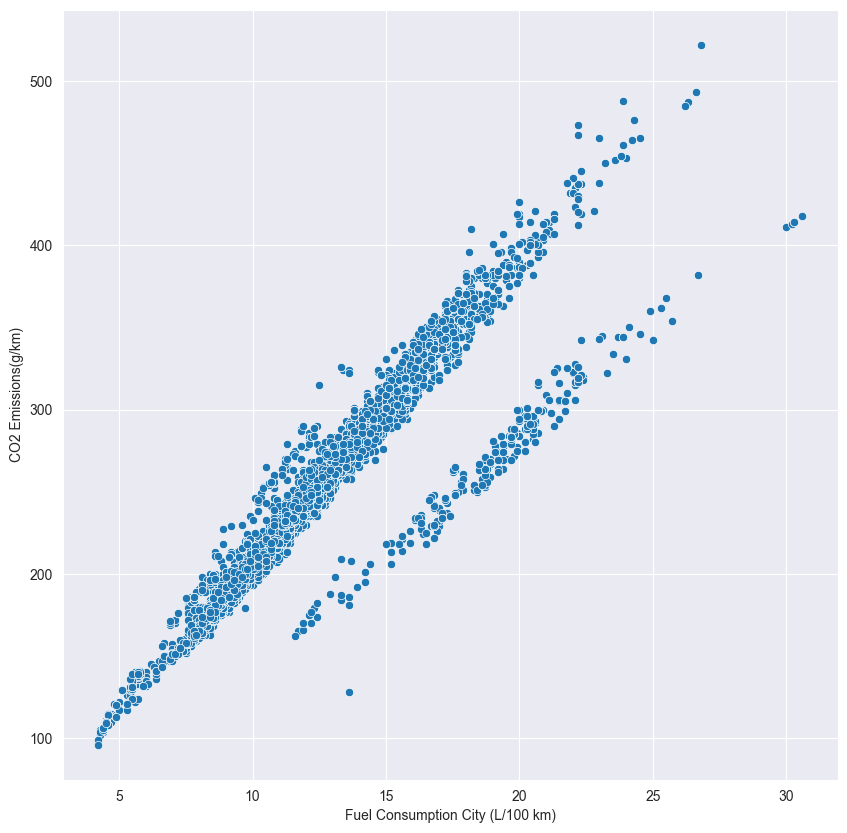

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x=df['Fuel Consumption City (L/100 km)'],y=df['CO2 Emissions(g/km)'])
plt.show()

<Axes: >

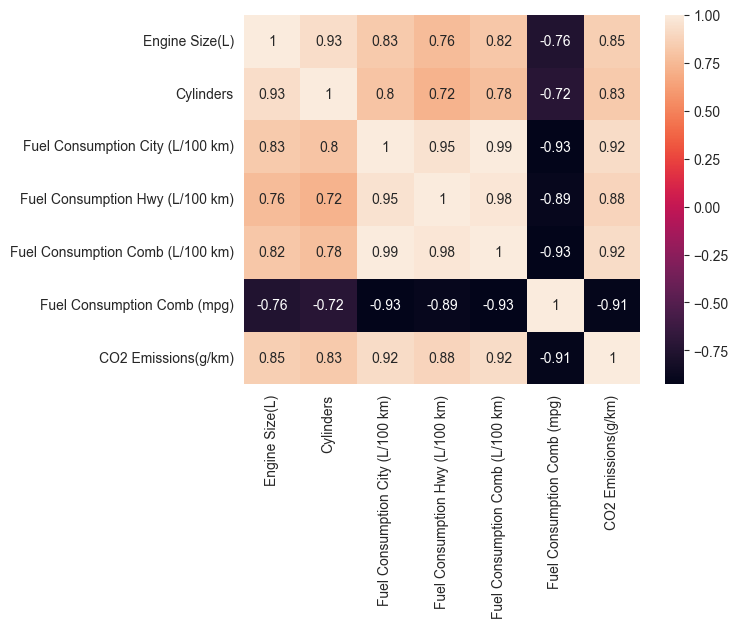

In [20]:
sns.heatmap(df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']].corr(),annot=True)

In [21]:
df = label_encoder(df,['Make','Model','Vehicle Class','Transmission','Fuel Type'])

In [22]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


In [23]:
def scaler_transform(dt:pd.DataFrame,col:list):
  for c in col:
    scaler = MinMaxScaler()
    dt[c] = scaler.fit_transform(dt[[c]])

  return dt

In [24]:
df = scaler_transform(df,['Engine Size(L)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)',	'Fuel Consumption Comb (mpg)'])

In [25]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,0.146667,4,14,4,0.215909,0.162651,0.200000,0.379310,196
1,0,1057,0,0.200000,4,25,4,0.265152,0.222892,0.250000,0.310345,221
2,0,1058,0,0.080000,4,22,4,0.068182,0.108434,0.081818,0.637931,136
3,0,1233,11,0.346667,6,15,4,0.321970,0.307229,0.318182,0.241379,255
4,0,1499,11,0.346667,6,15,4,0.299242,0.283133,0.295455,0.275862,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,0.146667,4,17,4,0.246212,0.222892,0.240909,0.327586,219
7381,41,1957,11,0.146667,4,17,4,0.265152,0.259036,0.263636,0.310345,232
7382,41,1960,11,0.146667,4,17,4,0.284091,0.277108,0.281818,0.275862,240
7383,41,1968,12,0.146667,4,17,4,0.265152,0.259036,0.263636,0.310345,232


# Train the Models

In [26]:
X,y = df.drop(columns='CO2 Emissions(g/km)',axis=1),df['CO2 Emissions(g/km)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Linear Regression

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)

Koeficienti [ 7.01538760e-02  3.98131985e-04  6.86769524e-01  4.05420371e+01
  5.55619516e+00 -4.17275164e-02  6.77260963e+00 -3.80825741e+01
  1.25313248e+01  1.90296423e+02 -1.56723767e+02]
Intercepts: 172.92800064232145


In [30]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 262.7871305206737
R2 score: 0.9197596847560561


# Lasso regression

In [31]:
model = LassoCV()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [-4.45550881e-02  3.38318952e-03  2.17385846e+00  0.00000000e+00
  2.42363033e+01 -6.61279269e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
Intercepts: 107.55286333007928
Learning rate 3.5228652693248628


In [32]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 859.7227821991838
R2 score: 0.7374893248030043


# Ridge Regression

In [33]:
model = RidgeCV()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [ 6.98639874e-02  4.05441504e-04  6.87726183e-01  4.04976072e+01
  5.56395430e+00 -4.34068606e-02  6.78197072e+00  4.12381927e+01
  5.30749352e+01  7.09671370e+01 -1.55908400e+02]
Intercepts: 172.52240723988146
Learning rate 0.1


In [34]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 262.63601084412045
R2 score: 0.919805828151519


# Elastic Net

In [35]:
model = ElasticNetCV()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [-2.95108227e-01  5.24462285e-03  2.13575610e+00  3.00682403e-01
  1.12704054e+01 -1.38304594e+00  4.10297277e-01  1.52092952e-01
  1.18040051e-01  1.40245586e-01 -9.55218890e-02]
Intercepts: 192.26503434568835
Learning rate 7.0457305386497255


In [36]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 1447.785434657338
R2 score: 0.5579282765776234


# Bayes Ridge

In [37]:
model= BayesianRidge()
model.fit(X_train,y_train)
print('Koeficienti',model.coef_)
print('Intercepts:',model.intercept_)
print('Learning rate',model.alpha_)

Koeficienti [ 6.98857762e-02  4.05270487e-04  6.87454638e-01  4.05110945e+01
  5.56242238e+00 -4.32339855e-02  6.78016402e+00  3.92764950e+01
  5.21230646e+01  7.37618012e+01 -1.56064828e+02]
Intercepts: 172.61296495873995
Learning rate 0.003393050564770517


In [38]:
pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'R2 score: {r2_score(y_test,pred)}')

MSE: 262.649075046907
R2 score: 0.919801839083455
